In [1]:
from torchvision.transforms import ToTensor

from convolutional_model1 import ConvolutionalModel1
from convolutional_model2 import ConvolutionalModel2
from emotionDetectionDataset import EmotionDetectionDataset
from torch_train import *
from torchvision import transforms

import math

In [2]:
from matplotlib import pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.tight_layout()


def print_precisions_recalls_and_fscores(precision_and_recall, classes):
    header = "{:<25}".format("Class") + "".join("{:<25}".format(key) for key in ['precision', 'recall', 'f1-score'])
    print(header)
    print("-" * len(header))

    for i, cls in enumerate(classes.keys()):
        f1 = 2 * precision_and_recall[i, 0] * precision_and_recall[i, 1] / (
                    precision_and_recall[i, 0] + precision_and_recall[i, 1])
        row_str = "{:<25}".format(classes[cls]) + "".join(
            "{:<25}".format(str(value if not math.isnan(value) else 0.)) for value in
            precision_and_recall[i]) + "{:<25}".format(str(f1 if not math.isnan(f1) else 0.))
        print(row_str)

# PRVI MODEL

In [3]:
ROOT_PATH = 'dataset'
config = {'max_epochs': 60, 'batch_size': 64, 'weight_decay': 0.01, 'lr': 0.001}

TRAIN_VAL_SPLIT = 0.75

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### SVE KLASE

In [4]:
MODEL_SAVE_PATH = './models/model.pth'

In [5]:
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=ToTensor())

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)
model = ConvolutionalModel1().to(device)

In [6]:
# ucitavanje saveanog modela
model.load_state_dict(torch.load('./models/model.pth'))

<All keys matched successfully>

In [15]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True, model_save_path=MODEL_SAVE_PATH)

Epoch 0, train loss=0.026398753747344017, train accuracy=0.3197101987739179
Epoch 0, validation loss=0.02367955818772316, validation accuracy=0.4212066322976174
Epoch 1, train loss=0.022533932700753212, train accuracy=0.44900613041055176
Epoch 1, validation loss=0.02244543470442295, validation accuracy=0.4441967395847847
Epoch 2, train loss=0.021785270422697067, train accuracy=0.4666078394947056
Epoch 2, validation loss=0.020990043878555298, validation accuracy=0.4907342900933538
Epoch 3, train loss=0.02135845273733139, train accuracy=0.4757105703139513
Epoch 3, validation loss=0.02110707201063633, validation accuracy=0.4956109795179044
Epoch 4, train loss=0.021041380241513252, train accuracy=0.488296488946684
Epoch 4, validation loss=0.021050307899713516, validation accuracy=0.4936603037480842
Epoch 5, train loss=0.02089082822203636, train accuracy=0.4944733420026008
Epoch 5, validation loss=0.01996912807226181, validation accuracy=0.5110770516929078
Epoch 6, train loss=0.020678216591

In [7]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

C:\Users\gloga\Lovro\FER\Svasta\neumre_projekt\torch_train.py:124: RuntimeWarning: invalid value encountered in scalar divide
  precision_i = tp_i / (tp_i + fp_i)


Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.4633431085043988       0.49478079331941544      0.47854618879353855      
disgusted                0.0                      0.0                      0.0                      
fearful                  0.42443729903536975      0.12890625               0.19775280898876405      
happy                    0.8666666666666667       0.7254791431792559       0.7898128260202516       
neutral                  0.44760881246641593      0.67558799675588         0.5384615384615384       
sad                      0.42432253800396563      0.5148356054530874       0.4652173913043478       
surprised                0.6578680203045685       0.779783393501805        0.7136563876651982       


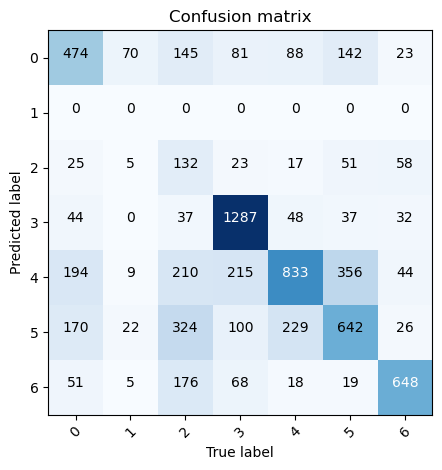

In [8]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)

### BEZ DISGUSTED

In [9]:
MODEL_SAVE_PATH = './models/model_bez_disgusted.pth'

In [10]:
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

excluded_classes = [1]
train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform, excluded_classes=excluded_classes), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=ToTensor(), excluded_classes=excluded_classes)

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)
model = ConvolutionalModel1().to(device)

In [11]:
# ucitavanje saveanog modela
model.load_state_dict(torch.load('./models/model.pth'))

<All keys matched successfully>

In [78]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True, model_save_path=MODEL_SAVE_PATH)

Epoch 0, train loss=0.025034083053469658, train accuracy=0.3556236736618722
Epoch 0, validation loss=0.022655567154288292, validation accuracy=0.4318053197509904
Epoch 1, train loss=0.021248113363981247, train accuracy=0.4688988446121198
Epoch 1, validation loss=0.02411503531038761, validation accuracy=0.4037917374080362
Epoch 2, train loss=0.02043800801038742, train accuracy=0.4930440933742042
Epoch 2, validation loss=0.020621586591005325, validation accuracy=0.48174872665534807
Epoch 3, train loss=0.02024536207318306, train accuracy=0.49794859702900257
Epoch 3, validation loss=0.02043009363114834, validation accuracy=0.48754951895868703
Epoch 4, train loss=0.019920913502573967, train accuracy=0.509832586654091
Epoch 4, validation loss=0.02059292420744896, validation accuracy=0.48429541595925296
Epoch 5, train loss=0.01970956288278103, train accuracy=0.5125677906154209
Epoch 5, validation loss=0.01962529867887497, validation accuracy=0.5175438596491229
Epoch 6, train loss=0.0195180699

In [12]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.49737670514165794      0.49478079331941544      0.4960753532182104       
fearful                  0.43137254901960786      0.12890625               0.19849624060150375      
happy                    0.8666666666666667       0.7254791431792559       0.7898128260202516       
neutral                  0.4497840172786177       0.67558799675588         0.5400324149108591       
sad                      0.4305835010060362       0.5148356054530874       0.46895544192841493      
surprised                0.6612244897959184       0.779783393501805        0.7156267255659856       


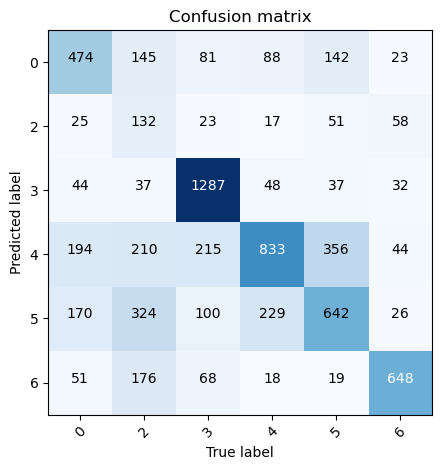

In [13]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)

# DRUGI MODEL

In [14]:
ROOT_PATH = 'dataset'
MODEL_SAVE_PATH = './models/model2.pth'
config = {'max_epochs': 60, 'batch_size': 64, 'weight_decay': 0.06, 'lr': 0.0001}

TRAIN_VAL_SPLIT = 0.8

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=transforms.ToTensor())

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)

model2 = ConvolutionalModel2().to(device)

In [15]:
model2.load_state_dict(torch.load('models/model2.pth'))

<All keys matched successfully>

In [ ]:
history = train_torch_model(model2, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True,
                            model_save_path=MODEL_SAVE_PATH)

In [16]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model2, test_data_loader, labels=labels, device=device)

C:\Users\gloga\Lovro\FER\Svasta\neumre_projekt\torch_train.py:124: RuntimeWarning: invalid value encountered in scalar divide
  precision_i = tp_i / (tp_i + fp_i)


Class                    precision                recall                   f1-score                 
----------------------------------------------------------------------------------------------------
angry                    0.5551801801801802       0.5146137787056367       0.534127843986999        
disgusted                0.0                      0.0                      0.0                      
fearful                  0.48936170212765956      0.134765625              0.2113323124042879       
happy                    0.8740109555690809       0.8094701240135288       0.8405033655253146       
neutral                  0.5149481391092129       0.6845093268450932       0.5877437325905293       
sad                      0.4156050955414013       0.627906976744186        0.5001596933886937       
surprised                0.7304038004750594       0.740072202166065        0.7352062163777644       


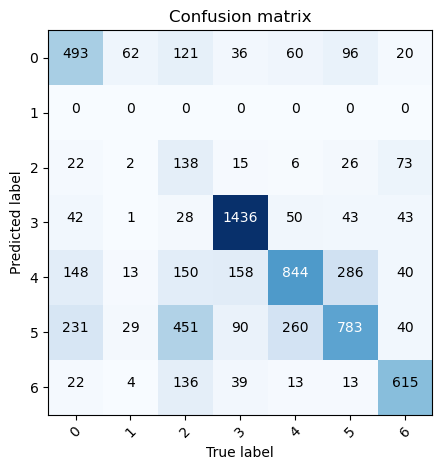

In [17]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=test.labels_and_classes)
print_precisions_recalls_and_fscores(precision_and_recall, classes=test.labels_and_classes)